# Detección de proyectos prometedores de la tienda online de videojuegos "Ice" 

## Tabla de contenidos

* [Introducción](#intro) 
* [Objetivos](#objetivos)
* [Preprocesamiento de  datos](#data_review)
* [Análisis exploratorio de datos](#EDA)
* [Perfiles de usuario por region](#perfiles)
* [Prueba de hipótesis](#hypotheses)
* [Conclusiones](#end)

## Introducción<a id='intro'></a>

La tienda online Ice que vende videojuegos por todo el mundo requiere identificar patrones en sus datos que determinen si un juego tiene éxito o no. Esto permitirá detectar proyectos prometedores y planificar campañas publicitarias.

Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. 

## Objetivos<a id='objetivos'></a>

1. Preprocesar los datos para el cálculo de ventas totales.
2. Realizar un analisis exploratorio de datos para responder varias preguntas comerciales.
3. Crear perfiles de usuario para cada región en la que opera la empresa.
4. Probar hipótesis con respecto a las calificaciones de los usuarios. 

## Preprocesamiento de datos <a id='data_review'></a>

In [153]:
# Importa liberías

import pandas as pd
import numpy as np
from scipy import stats as st
from matplotlib import pyplot as plt

In [154]:
# Carga de datos

games = pd.read_csv("/datasets/games.csv")

In [155]:
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [156]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


*Observaciones para el procesamiento de datos*

1. Los nombres de las columnas se deben transformar a minúsculas.
2. El campo "year_of_release" de tipo de dato "float" debe convertirse a "int". Al no contar con meses y días no hace falta cambiar a tipo "datetime".
3. Los campos "name", "year_of_release", "genre", "critic_score", "user_score" y "rating", tiene datos ausentes cuyo relleno deberá analizarse caso por caso.  

In [157]:
# Cambio de los nombres de columna a minúsculas

games = games.rename(columns=str.lower)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [158]:
# Cambia e tipo de dato de la columna a "int"

games["year_of_release"] = games["year_of_release"].astype('Int64')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


**Relleno de datos ausentes**

In [159]:
# Se define una función para el cálculo del porcentajes de cualquier tipo de valor

def percentage(dataframe,query):
    
    """
    
    Calculates the percentage of absent values for any selected pandas column.
    
    """
    
    value = len(dataframe.query(query))
    total = len(dataframe)
    percentage = (value/total)*100
    return percentage

*Preprocesamiento variable "name"*

In [160]:
games.query("name.isna()")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [161]:
games["name"].isna().sum()

2

No es posible conocer el nombre de estos dos juegos. Simplemente, se asignará el valor de "desconocido".

In [162]:
games['name'].fillna("desconocido", inplace=True)
games['name'].isna().sum()

0

*Preprocesamiento variable "year_of_release"*

In [163]:
games['year_of_release'].max()


2016

In [164]:
games['year_of_release'].min()

1980

In [165]:
games["year_of_release"].isna().sum()

269

In [166]:
games["year_of_release"].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

In [167]:
percentage(games, "year_of_release.isna()")

1.609332934489979

El porcentaje de datos ausentes de esta variable es bajo, no obstante se investigará un método de relleno. Inicialmente, se probará si existen nombres de juegos que si cuenten con el año de lanzamiento en unos registros y en otros no. 

In [168]:
len(games["name"].unique())

11560

In [169]:
games["name"].duplicated().sum()

5155

In [170]:
games[games["name"].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.0,3.2,M
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.0,6.4,M
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M
...,...,...,...,...,...,...,...,...,...,...,...
16706,Men in Black II: Alien Escape,GC,2003,Shooter,0.01,0.00,0.00,0.00,NaN,tbd,T
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,NaN
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Efectivamente, existen 5155 registros con nombres de juego iguales. Esto quiere decir que es posible que en algunos casos existan datos que puedan ser transmitidos a campos sin el dato de año. Para este fin, se aplicará el método groupby.

In [171]:
# Relleno de datos de "year_of_release" 

games_year = games.groupby('name')['year_of_release'].transform("mean").astype('Int64') #al buscarse solo un dato, es indiferente si se usa la función "mean" o "median"
games['year_of_release'] = games['year_of_release'].fillna(games_year)
games.query("year_of_release.isna()")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
475,wwe Smackdown vs. Raw 2006,PS2,<NA>,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
627,Rock Band,X360,<NA>,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,<NA>,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
805,Rock Band,Wii,<NA>,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1142,Rock Band,PS3,<NA>,Misc,0.99,0.41,0.00,0.22,92.0,8.4,T
...,...,...,...,...,...,...,...,...,...,...,...
16277,Homeworld Remastered Collection,PC,<NA>,Strategy,0.00,0.01,0.00,0.00,86.0,8.2,E10+
16288,Shorts,DS,<NA>,Platform,0.01,0.00,0.00,0.00,NaN,tbd,E10+
16348,Agarest Senki: Re-appearance,PS3,<NA>,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16458,Hakuouki: Shinsengumi Kitan,PS3,<NA>,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [172]:
percentage(games, "year_of_release.isna()")

0.8734669458570146

Después del relleno de datos, el porcentaje de datos ausentes de la variable "year_of_release" bajo aproximadamente a la mitad.

*Preprocesamiento de las variables "critic_score" y "user_score"*

In [173]:
games['critic_score'].isna().sum()

8578

In [174]:
percentage(games,'critic_score.isna()')

51.31917439425665

In [175]:
games['user_score'].isna().sum()

6701

In [176]:
percentage(games,'user_score.isna()')

40.08973975471134

In [177]:
len(games.query('user_score == "tbd"'))

2424

In [178]:
percentage(games,'user_score == "tbd"')

14.501944361352079

* El porcentaje de valores ausentes de las variables "critic_score" y "user_score" es demasiado alta (51.32 % y 40.32%). Se deberá investigar una forma de rellenar los datos. En principio, se podría explorar el uso de la media o mediana de las series de datos.

* Por otra parte, el que la variable "user_score"* sea de tipo "object", quiere decir que además de valores ausentes "nan" también contiene "strings". Estos valores de "strings" corresponden a calificaciones "tbd" o "to be determined" equivalentes al 14.5 % de los datos de este campo. Es decir, aproximadamente 44 % de los datos de este campo requieren algún preprocesamiento.  

En primer lugar, se reemplazarán los valores "tbd" por "nan", puesto que de lo contrario no se podría operar.

In [179]:
games = games.replace('tbd', np.nan)
len(games.query('user_score == "tbd"'))

0

In [180]:
games['user_score'] = games['user_score'].astype("float64")

In [181]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16569 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


In [182]:
games["critic_score"].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

In [183]:
games["user_score"].describe()

count    7590.000000
mean        7.125046
std         1.500006
min         0.000000
25%         6.400000
50%         7.500000
75%         8.200000
max         9.700000
Name: user_score, dtype: float64

Para las series "critic_score" y "user_score" no se detectan valores extremos. Por lo tanto, se puede usar la media de las series para el relleno de datos.

In [184]:
games["critic_score"] = games["critic_score"].replace(np.nan,games["critic_score"].mean())
games["user_score"] = games["user_score"].replace(np.nan,games["user_score"].mean())

In [185]:
games["critic_score"].isna().sum()

0

In [186]:
games["user_score"].isna().sum()

0

*Preprocesamiento variable "genre"*

In [187]:
games.query("genre.isna()")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,desconocido,GEN,1993,NaN,1.78,0.53,0.00,0.08,68.967679,7.125046,NaN
14244,desconocido,GEN,1993,NaN,0.00,0.00,0.03,0.00,68.967679,7.125046,NaN


No es posible conocer el nombre de estos dos géneros. Simplemente, se asignará el valor de "desconocido".

In [188]:
games['genre'].fillna("desconocido", inplace=True)
games['genre'].isna().sum()

0

*Preprocesamiento variable "rating"*

In [189]:
games["rating"].isna().sum()

6766

In [190]:
percentage(games,'rating.isna()')

40.478612025127134

El porcentaje de datos ausentes de la variable "rating" es alto (40.48 %). Para el relleno, se agruparán los datos por género y se escogerá el "rating" más común a ese tipo de género. 

In [191]:
#Función para calcular el modo (valor más común)

def get_mode(series):
    mode = series.mode()
    if mode.size == 1:
        return mode[0]

In [192]:
# Relleno de datos de "rating" 

genre_rating = games.groupby('genre')['rating'].transform(get_mode)
games['rating'] = games['rating'].fillna(genre_rating)
games['rating'].isna().sum()

2

In [193]:
percentage(games,'rating.isna()')

0.011965300628178284

Después del preprocesamiento, el porcentaje de datos ausentes de la variable "rating" bajo de 40.48 % a 0.01%. 

**Inspección final del preprocesamiento de datos**

In [194]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16569 non-null  Int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16713 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


**Conclusiones preprocesamiento de datos**

* La tarea más importante del preprocesamiento de datos fue el relleno de valores ausentes. Las variables más importantes de este proceso fueron "critic_score", "user_score", y "rating" debido a su alto porcentaje de datos ausentes. Con el uso de los valores de media para "critic_score" y "user_score", y modo para "rating" se logró rellenar casi completamente los datos.

## Análisis exploratorio de datos <a id='EDA'></a>

**Número de lazamientos de video juegos por año**

Como primer paso del análisis exploratorio de datos, se investigará cuántos juegos fueron lanzados en diferentes años y si son significativos los datos de cada período.

In [195]:
# Variación anual del número de lanzamiento de videojuegos

games_per_year = games.groupby('year_of_release')['name'].count().reset_index()
games_per_year.rename(columns = {'name':'number_of_games'}, inplace = True)
games_per_year

,year_of_release,number_of_games
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


Text(0, 0.5, 'Number of Games')

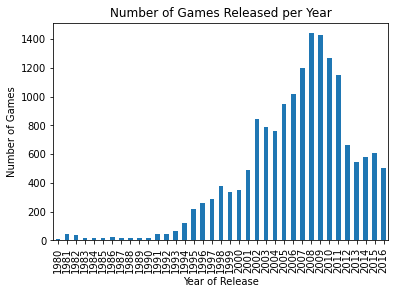

In [196]:
games_per_year.plot.bar(x="year_of_release", y="number_of_games", legend=False)
plt.title("Number of Games Released per Year")
plt.xlabel("Year of Release")
plt.ylabel("Number of Games")

En función de los resultados, se puede apreciar que el número de lanzamientos empieza a "despegar" desde el año 1994.

**Variación de ventas en función de la plataforma**

Se observará cómo varían las ventas de una plataforma a otra. Se eligirán las plataformas con las mayores ventas totales y se construirá una distribución basada en los datos de cada año. Se buscarán las plataformas que solían ser populares pero que ahora no tienen ventas. Se intentrá responder a la siguiente pregunta: ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?

In [197]:
# Variación de ventas en función de la plataforma

games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
total_sales_per_platform = games.groupby('platform')['total_sales'].sum().reset_index()
total_sales_per_platform.sort_values(by=['total_sales'], ascending = False)

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


Las plataformas con la mayor cantidad de ventas totales son: 1) PS2, 2) X360, 3) PS3. En base a estos datos se construirán las distribuciones anuales. 	

In [198]:
# Función para la selección de datos

def data_selection(data): 
    result = games.query("platform == @data")
    result = result.groupby('year_of_release')['total_sales'].sum().reset_index()
    return result

In [199]:
PS2 = data_selection("PS2")
X360 = data_selection("X360")
PS3 = data_selection("PS3")

In [200]:
# Variables para gráficos

platforms = [PS2, X360, PS3]
PS2.name = "PS2"
X360.name = "X360"
PS3.name = "PS3"

In [201]:
# Función para graficar distribuciones anuales de ventas

def anual_sales(platforms):
    
    for platform in platforms:      
            
        platform.plot.bar(x="year_of_release", y="total_sales", rot=45, legend=False)
        plt.xlabel("Year")
        plt.ylabel('Sales in Millions')
        plt.title(f"Sales per Year ({platform.name})")
        plt.show()

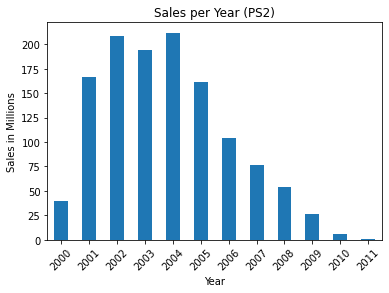

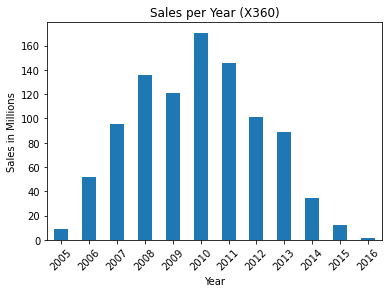

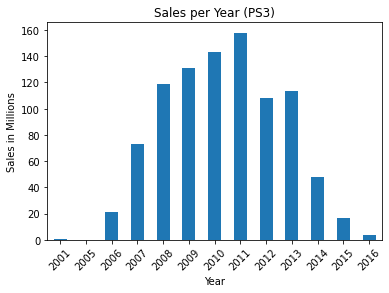

In [202]:
anual_sales(platforms)

En las plataformas con mayores ventas se puede apreciar que las mismas tuvieron una época de popularidad (aproximadamente de 3 a 4 años) y que luego sus ventas bajaron. Los períodos de popularidad de cada plataforma se detallan a continuación:

1. PS2: 2001-2004.
2. X360: 2006-2010.
3. PS3: 2007-2011.

Ahora investigaremos a las plataformas que solían ser populares pero que ahora no tienen ventas.

In [203]:
# Ventas anuales totales de cada plataforma

games.pivot_table(index=['platform'], columns='year_of_release',values='total_sales', aggfunc='sum')

year_of_release,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
2600,11.38,35.68,28.88,5.84,0.27,0.45,0.67,1.94,0.74,0.63,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3DS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.30,63.20,51.76,56.57,43.76,27.78,15.14
DC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.02,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DS,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,...,147.23,145.36,119.56,85.35,26.33,11.67,1.54,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.43,64.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GBA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


De los resultados de la tabla pivot podemos analizar los casos de tres plataformas que fueron populares pero que ahora ya no tienen ventas:

1. PSP.
2. NES.
3. DS.

In [204]:
# Selección de datos

PSP = data_selection("PSP")
NES = data_selection("NES")
DS = data_selection("DS")

In [205]:
# Variables para gráficos

platforms = [PSP, NES, DS]
PSP.name = "PSP"
NES.name = "NES"
DS.name = "DS"

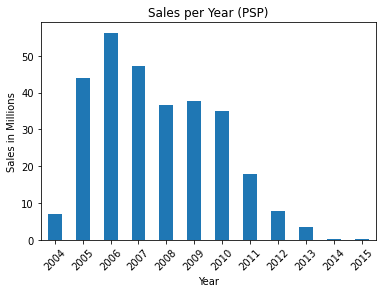

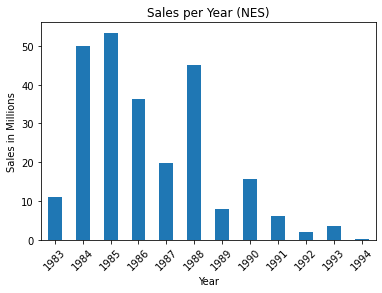

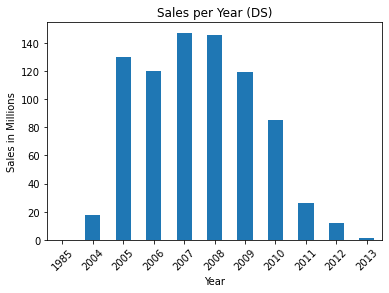

In [206]:
anual_sales(platforms)

De este análisis podemos concluir que el ciclo de vida de las plataformas es de aproximadamente 10 años. Por lo tanto, para construir un modelo solo deberíamos considerar los datos a partir del año 2006. En este sentido, ahora exploraremos las plataformas que tuvieron ventas los últimos 10 años (exceptuando las ya analizadas PS2, X360 y PS3) para conocer cuales tienen mayor potencial de futuras ventas. Adicionalmente, los análisis posteriores incluirán solo datos de los últimos 10 años.

In [207]:
# Dataframe filtrado para examinar solo los últimos 10 años de datos

games = games.query("year_of_release >= 2006")

In [208]:
# Selección de datos

three_DS = data_selection("3DS")
PS4 = data_selection("PS4")
PSV = data_selection("PSV")
Wii = data_selection("Wii")
WiiU = data_selection("WiiU")
XOne = data_selection("XOne")

In [209]:
# Variables para gráficos

platforms = [three_DS, PS4, PSV, Wii, WiiU, XOne]
three_DS.name = "3DS"
PS4.name = "PS4"
PSV.name = "PSV"
Wii.name = "Wii"
WiiU.name = "WiiU"
XOne.name = "XOne"

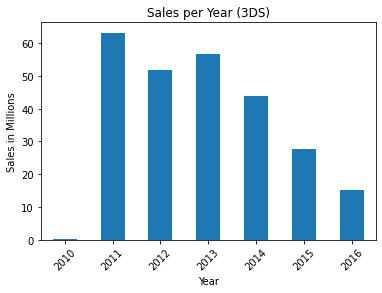

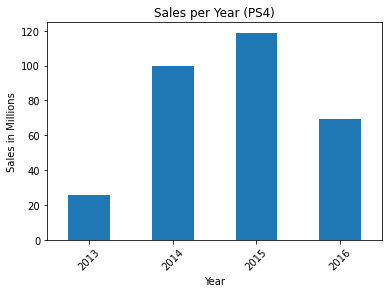

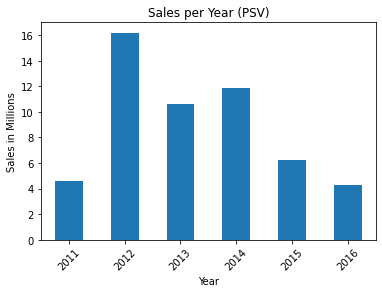

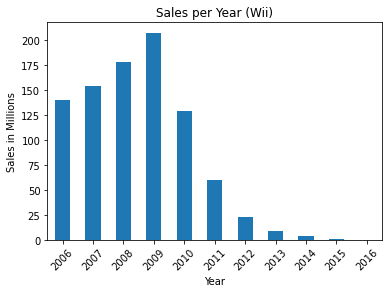

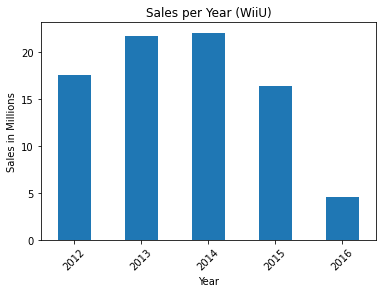

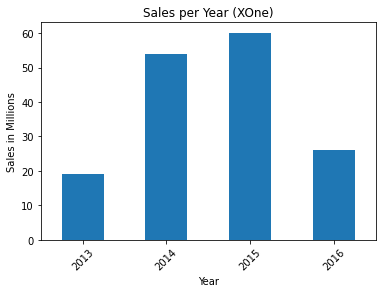

In [210]:
anual_sales(platforms)

Del análisis anterior se concluye que todas las plataformas muestran una tendencia decreciente en ventas, algunas muy dramáticas como el caso de Wii.

**Ventas globales por plataforma (diagrama de cajas)**

A continuación se investigará la dispersión de las ventas totales y de sus promedios anuales.

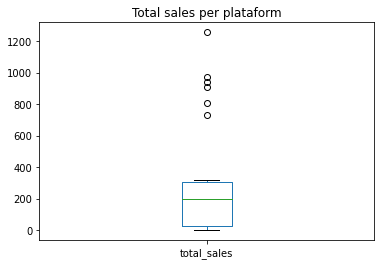

In [211]:
# Análisis de la dispersión de valores totales de ventas

total_sales_per_platform['total_sales'].plot(kind='box', title='Total sales per plataform')
plt.show()

El diagrama de cajas determina que existen diferencias significativas en el total de ventas para las distintas plataformas. La mediana se encuentra en el valor de 200 millones de dólares, y existen valores extremos que sobrepasan los 800 millones. A continuación se procederá a analizar la dispersión de los valores anuales promedio.

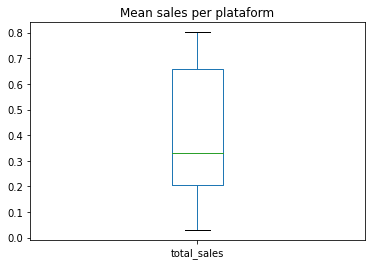

In [212]:
# Análisis de la dispersión de valores promedio de ventas

mean_sales_per_platform = games.groupby('platform')['total_sales'].mean().reset_index()
mean_sales_per_platform.sort_values(by=['total_sales'], ascending = False)
mean_sales_per_platform['total_sales'].plot(kind='box', title='Mean sales per plataform')
plt.show()

El diagrama de cajas revela que la mediana de los valores promedio anuales es de trescientos mil de dólares, y los valores extremos son de aproximadamente 800 mil dólares.

**Relación entre reseñas y ventas**

En esta sección se analizará la relación entre las reseñas y ventas para la plataforma Wii.

<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

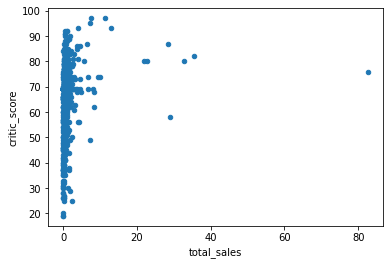

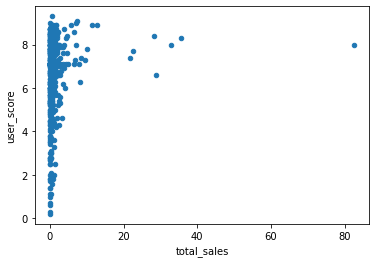

In [213]:
Wii_reviews = games.query("platform == 'Wii'")
Wii_reviews.plot.scatter(x = 'total_sales', y = 'critic_score')
Wii_reviews.plot.scatter(x = 'total_sales', y = 'user_score')

In [214]:
Wii_reviews.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
year_of_release,1.000000,-0.085877,-0.064731,-0.052607,-0.081936,0.157121,0.073303,-0.077217
na_sales,-0.085877,1.000000,0.971791,0.769748,0.988304,0.123552,0.081811,0.992603
eu_sales,-0.064731,0.971791,1.000000,0.776003,0.992602,0.113216,0.075877,0.989542
jp_sales,-0.052607,0.769748,0.776003,1.000000,0.769352,0.149268,0.102523,0.813783
other_sales,-0.081936,0.988304,0.992602,0.769352,1.000000,0.111082,0.075535,0.995140
critic_score,0.157121,0.123552,0.113216,0.149268,0.111082,1.000000,0.493034,0.124436
user_score,0.073303,0.081811,0.075877,0.102523,0.075535,0.493034,1.000000,0.083256
total_sales,-0.077217,0.992603,0.989542,0.813783,0.995140,0.124436,0.083256,1.000000


En función del análisis se determina que no existe una correlación entre las ventas y las reseñas. Los gráficos de dispersión no muestran ninguna tendencia, y los valores de correlación son muy bajos (0.12 y 0.08 para "critic_score" y "user_score" respectivamente).

**Venta de juegos en diferentes plataformas**

En esta sección se analizará si el cambio de plataforma incide en la venta de juegos.

In [215]:
# Encuentra los registros con nombres de juegos duplicados

games[games['name'].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.000000,8.100000,M,16.27
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.000000,4.800000,M,13.68
37,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88.000000,3.200000,M,13.33
41,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88.000000,6.400000,M,12.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.000000,8.300000,M,12.62
...,...,...,...,...,...,...,...,...,...,...,...,...
16691,Dynasty Warriors: Eiketsuden,PS3,2016,Action,0.00,0.00,0.01,0.00,68.967679,7.125046,T,0.01
16692,Metal Gear Solid V: Ground Zeroes,PC,2014,Action,0.00,0.01,0.00,0.00,80.000000,7.600000,M,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,68.967679,7.125046,E,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,68.967679,7.125046,T,0.01


En virtud de que existen 5155 juegos que se vendieron en mas de una plataforma, se escogará un pequeño grupo aleatoriamente para el análisis.

In [216]:
grand_theft = games.query("name == 'Grand Theft Auto V'")
grand_theft

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
165,Grand Theft Auto V,XOne,2014,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
1730,Grand Theft Auto V,PC,2015,Action,0.39,0.69,0.00,0.09,96.0,7.9,M,1.17


In [217]:
call_of_duty = games.query("name == 'Call of Duty: Black Ops II'")
call_of_duty

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83.0,4.8,M,13.68
1227,Call of Duty: Black Ops II,PC,2012,Shooter,0.64,0.69,0.00,0.19,74.0,4.2,M,1.52
4706,Call of Duty: Black Ops II,WiiU,2012,Shooter,0.20,0.18,0.00,0.03,81.0,6.9,M,0.41


En base al análisis se determina que la plataforma incide notablemente en las ventas de los juegos.

**Relación entre juegos y género**

En esta sección se analizará la distribución general de ventas de los juegos por género.

In [218]:
games.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre
Action          1132.65
Sports           798.23
Shooter          722.36
Misc             556.83
Role-Playing     522.76
Racing           299.08
Platform         279.74
Simulation       221.15
Fighting         188.65
Adventure        141.37
Puzzle            90.57
Strategy          73.77
Name: total_sales, dtype: float64

Los géneros más vendidos son los de acción, deportes y disparos. Por otra parte, los juegos con menos demanda son los de aventura, rompecabezas y estrategia. Se puede afirmar que los géneros más vendidos son dinámicos y los menos vendidos aquellos con carácter educativo.  

**Conclusiones intermedias del análisis exploratorio de datos**

1. El número de lanzamientos empieza a "despegar" desde el año 1994 (200 juegos aproximadamente), alcanza su pico en 2008 (1400 aproximadamente) y a partir de ese año la creación de nuevos juegos empieza a decaer.
2. Las plataformas con la mayor cantidad de ventas totales son PS2, X360, PS3; cada una con más de 900 millones de ingresos durante el período 1980-2016.
3. En general, el ciclo de vida de las plataformas es de aproximadamente 10 años.
4. Todas las plataformas muestran una tendencia decreciente en ventas, algunas muy dramáticas como el caso de Wii.
5. Conciderando los datos de los últimos 10 años, existen diferencias significativas en el total de ventas para las distintas plataformas. Los valores por encima de los 800 millones-en principio-se pueden considerar atípicos.
6. No existe una correlación entre las ventas y las reseñas. Los gráficos de dispersión no muestran ninguna tendencia, y los valores de correlación son muy bajos (0.12 y 0.08 para "critic_score" y "user_score" respectivamente).
7. Para juegos que se venden en diferentes plataformas, las mismas inciden notablemente en las ventas.
8. Los géneros más vendidos son los de acción, deportes y disparos. Por otra parte, los juegos con menos demanda son los de aventura, rompecabezas y estrategia. Se puede afirmar que los géneros más vendidos son dinámicos y los menos vendidos aquellos con carácter educativo. 

## Perfiles de usuario por región <a id='perfiles'></a>

En primer lugar, se investigará para cada región las cinco plataformas principales y las variaciones en de cuotas de mercado de una región a otra. Cabe recordar que todos los análisis se centran en el período 2006-2016 de conformidad con los resultados del ciclo de vida de los videojuegos.

**Ventas y cuotas de mercado**

In [219]:
# Función para determinar las principales plataformas por región

def platform_region(regional_sales):
    result = games.groupby('platform')[regional_sales].sum().sort_values(ascending=False).head(5)
    return result

In [220]:
# Principales lataformas en América del Norte

platform_region("na_sales")

platform
X360    591.47
Wii     494.01
PS3     391.60
DS      325.06
PS2     115.16
Name: na_sales, dtype: float64

In [221]:
# Principales plataformas en Europa

platform_region("eu_sales")

platform
PS3     328.35
X360    269.25
Wii     261.48
DS      143.30
PS4     141.09
Name: eu_sales, dtype: float64

In [222]:
# Principales plataformas en Japón

platform_region("jp_sales")

platform
DS     141.49
3DS    100.62
PS3     79.51
PSP     71.13
Wii     69.05
Name: jp_sales, dtype: float64

In [223]:
# Función para determinar las cuotas de mercado de cada plataforma por región

def market_share(regional_sales):
    platform = platform_region(regional_sales)
    total = games.groupby('platform')[regional_sales].sum().sum()
    result = ((platform/total)*100).sort_values(ascending=False).head(5)
    return result

In [224]:
market_share("na_sales")

platform
X360    24.616377
Wii     20.560191
PS3     16.297992
DS      13.528665
PS2      4.792842
Name: na_sales, dtype: float64

In [225]:
market_share("eu_sales")

platform
PS3     21.813073
X360    17.886919
Wii     17.370739
DS       9.519760
PS4      9.372945
Name: eu_sales, dtype: float64

In [226]:
market_share("jp_sales")

platform
DS     25.138136
3DS    17.876877
PS3    14.126321
PSP    12.637470
Wii    12.267922
Name: jp_sales, dtype: float64

En la siguiente tabla se presenta un resumen de los resultados del análisis de ventas y cuotas de mercado para las plataformas más demandadas por región.

Región | Plataforma | Ventas (MM) | Cuota de mercado (%)
------------ | ------------- | ------------- | -------------
América del Norte | X360 | 591.47 | 24.62 
Europa | PS3 | 328.35 | 21.81
Japón | DS | 141.49 | 25.14

**Géneros**

A continuación se analizarán los géneros principales por región.

In [227]:
# Función para determinar las principales géneros por región

def genre_region(regional_sales):
    result = games.groupby('genre')[regional_sales].sum().sort_values(ascending=False).head(5)
    return result

In [228]:
genre_region("na_sales")

genre
Action          538.92
Sports          399.42
Shooter         375.65
Misc            285.73
Role-Playing    199.71
Name: na_sales, dtype: float64

In [229]:
genre_region("eu_sales")

genre
Action     356.35
Sports     252.42
Shooter    241.06
Misc       147.07
Racing     113.42
Name: eu_sales, dtype: float64

In [230]:
genre_region("jp_sales")

genre
Role-Playing    170.58
Action          102.08
Misc             65.55
Sports           49.23
Platform         35.20
Name: jp_sales, dtype: float64

En América y Europa existen las mismas preferencias por los géneros de los videojuegos. Para estas dos regiones, los principales géneros son: acción, deportes y disparos. En Japón, las preferencias son diferentes: juego de roles, acción y "varios".

**Análisis de clasificación "ESRB"**

Finalmente, se analizará si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

In [231]:
# Función para determinar la relación entre clasificación del juego y ventas

def rating_region(regional_sales):
    result = games.groupby('rating')[regional_sales].sum().sort_values(ascending=False).head(5)
    return result

In [232]:
rating_region("na_sales")

rating
E       917.84
M       604.98
T       556.15
E10+    322.46
EC        1.32
Name: na_sales, dtype: float64

In [233]:
rating_region("eu_sales")

rating
E       584.99
M       423.25
T       319.26
E10+    177.76
RP        0.03
Name: eu_sales, dtype: float64

In [234]:
rating_region("jp_sales")

rating
T       253.25
E       226.56
M        46.47
E10+     36.57
EC        0.00
Name: jp_sales, dtype: float64

Una vez más América del Norte y Europa muestran patrones de consumo iguales. Los juegos con las clasificaciones "E", "M" y "T" son los más vendidos en estas regiones. En Japón son: "T", "E" y "M".

**Conclusiones intermedias perfiles de usuario**

1. Las plataformas con más ventas y cuotas de mercado en América del Norte, Eurpoa y Japón son: X360 (591.47 M y 24.62 %), PS3 (328.35 M y 21.81 %) y Japón (141.49 M y 25.14 %) respectivamente.
2. En América y Europa existen las mismas preferencias por los géneros de los videojuegos. Para estas dos regiones, los principales géneros son: acción, deportes y disparos. En Japón, las preferencias son diferentes: juego de roles, acción y "varios".
3. Una vez más América del Norte y Europa muestran patrones de consumo iguales. Los juegos con las clasificaciones "E", "M" y "T" son los más vendidos en estas regiones. En Japón son: "T", "E" y "M".

## Prueba de hipótesis<a id='#hypotheses'></a>

En esta sección se probarán dos hipótesis:

1. Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
2. Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

**Prueba 1: Hipótesis sobre las plataformas Xbox One y PC**

* h0: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
* h1: Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC difieren.

In [235]:
# Prueba 1

xbox_one = games.query("platform == 'XOne'") 
xbox_one_ratings = xbox_one["user_score"]
pc = games.query("platform == 'PC'") 
pc_ratings = pc["user_score"]

alpha = 0.05 # el nivel de significancia estadística crítica
# si el valor p es menor que alfa, rechazamos la hipótesis

results = st.ttest_ind(xbox_one_ratings, pc_ratings)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:  0.0264003209061067
Rechazamos la hipótesis nula


En este caso concluimos que lo más probable es que las calificaciones de los usuarios de las plataformas Xbox One y PC son en realidad diferentes.

**Prueba 2: Hipótesis sobre géneros de Acción y Deportes**

* ho: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales.
* h1: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

In [236]:
# Prueba 2

action = games.query("genre == 'Action'") 
action_ratings = action["user_score"]
sports = games.query("genre == 'Sports'") 
sports_ratings = sports["user_score"]

alpha = 0.05 # el nivel de significancia estadística crítica
# si el valor p es menor que alfa, rechazamos la hipótesis

results = st.ttest_ind(action_ratings, sports_ratings)

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

p-value:  3.260161804340124e-10
Rechazamos la hipótesis nula


En este caso concluimos que lo más probable es que las calificaciones de los géneros acción y deportes efectivamente son diferentes.

## Conclusiones<a id='#end'></a>

La industria de los videojuegos es en extremo dinámica. El ciclo de vida de las plataformas es de aproximadamente 10 años. Por otra parte, es llamativo apreciar que la industria generó grandes ganancias en la década 2006-2016, sin embargo la tendencia de ventas es decreciente en todos los casos. Finalmente, América del Norte y Europa exhiben patrones de consumo similares, por el contrario Japón, tiene sus propias tendencias.